This is a companion notebook for the book [Deep Learning with Python, Second Edition](https://www.manning.com/books/deep-learning-with-python-second-edition?a_aid=keras&a_bid=76564dff). For readability, it only contains runnable code blocks and section titles, and omits everything else in the book: text paragraphs, figures, and pseudocode.

**If you want to be able to follow what's going on, I recommend reading the notebook side by side with your copy of the book.**

This notebook was generated for TensorFlow 2.6.

# Introduction to Keras and TensorFlow

## What's TensorFlow?

## What's Keras?

## Keras and TensorFlow: A brief history

## Setting up a deep-learning workspace

### Jupyter notebooks: The preferred way to run deep-learning experiments

### Using Colaboratory

#### First steps with Colaboratory

#### Installing packages with pip

#### Using the GPU runtime

## First steps with TensorFlow

#### Constant tensors and variables

**All-ones or all-zeros tensors**

In [1]:
import tensorflow as tf
x = tf.ones(shape=(2, 1))
print(x)

tf.Tensor(
[[1.]
 [1.]], shape=(2, 1), dtype=float32)


In [ ]:
x = tf.zeros(shape=(2, 1))
print(x)

**Random tensors**

In [ ]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

In [ ]:
x = tf.random.uniform(shape=(3, 1), minval=0., maxval=1.)
print(x)

**NumPy arrays are assignable**

In [ ]:
import numpy as np
x = np.ones(shape=(2, 2))
x[0, 0] = 0.

**Creating a TensorFlow variable**

In [ ]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

**Assigning a value to a TensorFlow variable**

In [ ]:
v.assign(tf.ones((3, 1)))

**Assigning a value to a subset of a TensorFlow variable**

In [ ]:
v[0, 0].assign(3.)

**Using `assign_add`**

In [ ]:
v.assign_add(tf.ones((3, 1)))

#### Tensor operations: Doing math in TensorFlow

**A few basic math operations**

In [ ]:
a = tf.ones((2, 2))
b = tf.square(a)
c = tf.sqrt(a)
d = b + c
e = tf.matmul(a, b)
e *= d

#### A second look at the GradientTape API

**Using the `GradientTape`**

In [ ]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

**Using `GradientTape` with constant tensor inputs**

In [ ]:
input_const = tf.constant(3.)
with tf.GradientTape() as tape:
   tape.watch(input_const)
   result = tf.square(input_const)
gradient = tape.gradient(result, input_const)

**Using nested gradient tapes to compute second-order gradients**

In [ ]:
time = tf.Variable(0.)
with tf.GradientTape() as outer_tape:
    with tf.GradientTape() as inner_tape:
        position =  4.9 * time ** 2
    speed = inner_tape.gradient(position, time)
acceleration = outer_tape.gradient(speed, time)

#### An end-to-end example: A linear classifier in pure TensorFlow

**Generating two classes of random points in a 2D plane**

In [3]:
import numpy as np

In [4]:
num_samples_per_class = 1000
negative_samples = np.random.multivariate_normal(
    mean=[0, 3],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)
positive_samples = np.random.multivariate_normal(
    mean=[3, 0],
    cov=[[1, 0.5],[0.5, 1]],
    size=num_samples_per_class)

**Stacking the two classes into an array with shape (2000, 2)**

In [5]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

**Generating the corresponding targets (0 and 1)**

In [6]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

**Plotting the two point classes**

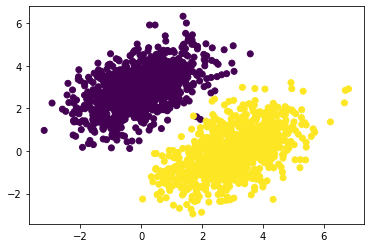

In [7]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

**Creating the linear classifier variables**

In [8]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

**The forward pass function**

In [9]:
def model(inputs):
    return tf.matmul(inputs, W) + b

**The mean squared error loss function**

In [10]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

**The training step function**

In [11]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

**The batch training loop**

In [12]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 2.1175
Loss at step 1: 0.3547
Loss at step 2: 0.1524
Loss at step 3: 0.1217
Loss at step 4: 0.1107
Loss at step 5: 0.1025
Loss at step 6: 0.0953
Loss at step 7: 0.0888
Loss at step 8: 0.0829
Loss at step 9: 0.0775
Loss at step 10: 0.0726
Loss at step 11: 0.0682
Loss at step 12: 0.0641
Loss at step 13: 0.0605
Loss at step 14: 0.0572
Loss at step 15: 0.0542
Loss at step 16: 0.0514
Loss at step 17: 0.0490
Loss at step 18: 0.0467
Loss at step 19: 0.0447
Loss at step 20: 0.0428
Loss at step 21: 0.0411
Loss at step 22: 0.0396
Loss at step 23: 0.0382
Loss at step 24: 0.0370
Loss at step 25: 0.0358
Loss at step 26: 0.0348
Loss at step 27: 0.0338
Loss at step 28: 0.0330
Loss at step 29: 0.0322
Loss at step 30: 0.0315
Loss at step 31: 0.0309
Loss at step 32: 0.0303
Loss at step 33: 0.0297
Loss at step 34: 0.0293
Loss at step 35: 0.0288
Loss at step 36: 0.0284
Loss at step 37: 0.0281
Loss at step 38: 0.0278
Loss at step 39: 0.0275


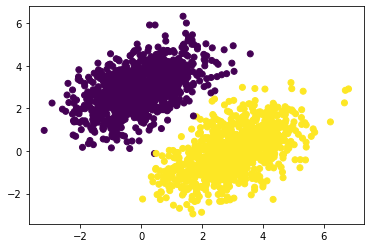

In [13]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

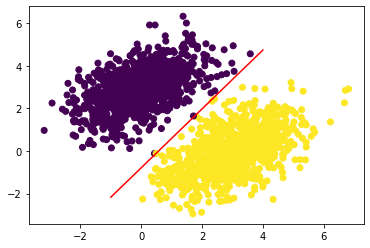

In [14]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

w4_prac

In [15]:
num_samples_per_class = 500

negative_samples = np.random.multivariate_normal( mean=[2, 3],
cov=[[1, 0.2],[0.5, 1]], size=num_samples_per_class)
positive_samples = np.random.multivariate_normal( mean=[3, 1],
cov=[[1, 0.5],[0.5, 1]], size=num_samples_per_class)

<ipython-input-15-ca6674b7da79>:3: RuntimeWarning: covariance is not positive-semidefinite.
  negative_samples = np.random.multivariate_normal( mean=[2, 3],


In [16]:
inputs = np.vstack((negative_samples, positive_samples)).astype(np.float32)

In [17]:
targets = np.vstack((np.zeros((num_samples_per_class, 1), dtype="float32"),
                     np.ones((num_samples_per_class, 1), dtype="float32")))

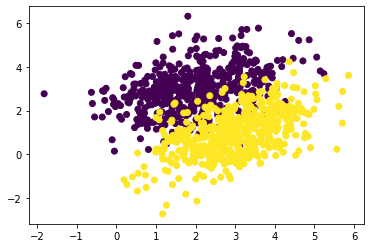

In [18]:
import matplotlib.pyplot as plt
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets[:, 0])
plt.show()

In [19]:
input_dim = 2
output_dim = 1
W = tf.Variable(initial_value=tf.random.uniform(shape=(input_dim, output_dim)))
b = tf.Variable(initial_value=tf.zeros(shape=(output_dim,)))

In [20]:
def model(inputs):
    return tf.matmul(inputs, W) + b

In [21]:
def square_loss(targets, predictions):
    per_sample_losses = tf.square(targets - predictions)
    return tf.reduce_mean(per_sample_losses)

In [22]:
learning_rate = 0.1

def training_step(inputs, targets):
    with tf.GradientTape() as tape:
        predictions = model(inputs)
        loss = square_loss(targets, predictions)
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss, [W, b])
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

In [23]:
for step in range(40):
    loss = training_step(inputs, targets)
    print(f"Loss at step {step}: {loss:.4f}")

Loss at step 0: 7.2364
Loss at step 1: 15.1533
Loss at step 2: 34.5073
Loss at step 3: 80.0082
Loss at step 4: 186.2602
Loss at step 5: 434.0759
Loss at step 6: 1011.9399
Loss at step 7: 2359.3652
Loss at step 8: 5501.1768
Loss at step 9: 12826.9736
Loss at step 10: 29908.6055
Loss at step 11: 69738.0234
Loss at step 12: 162608.6719
Loss at step 13: 379156.0312
Loss at step 14: 884081.4375
Loss at step 15: 2061420.6250
Loss at step 16: 4806635.0000
Loss at step 17: 11207676.0000
Loss at step 18: 26133042.0000
Loss at step 19: 60934660.0000
Loss at step 20: 142081888.0000
Loss at step 21: 331293664.0000
Loss at step 22: 772480512.0000
Loss at step 23: 1801200384.0000
Loss at step 24: 4199875072.0000
Loss at step 25: 9792887808.0000
Loss at step 26: 22834167808.0000
Loss at step 27: 53242642432.0000
Loss at step 28: 124146368512.0000
Loss at step 29: 289473232896.0000
Loss at step 30: 674967453696.0000
Loss at step 31: 1573828165632.0000
Loss at step 32: 3669710077952.0000
Loss at step 3

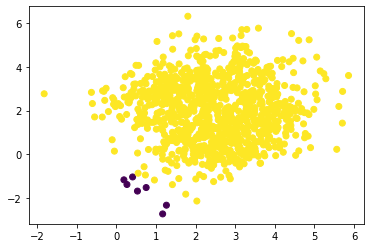

In [24]:
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()

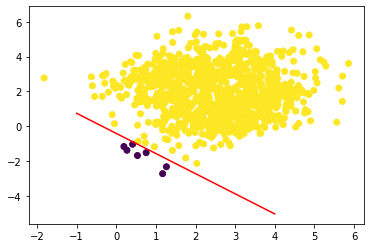

In [25]:
x = np.linspace(-1, 4, 100)
y = - W[0] /  W[1] * x + (0.5 - b) / W[1]
plt.plot(x, y, "-r")
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)

## Anatomy of a neural network: Understanding core Keras APIs

### Layers: The building blocks of deep learning

#### The base Layer class in Keras

**A `Dense` layer implemented as a `Layer` subclass**

In [ ]:
from tensorflow import keras

class SimpleDense(keras.layers.Layer):

    def __init__(self, units, activation=None):
        super().__init__()
        self.units = units
        self.activation = activation

    def build(self, input_shape):
        input_dim = input_shape[-1]
        self.W = self.add_weight(shape=(input_dim, self.units),
                                 initializer="random_normal")
        self.b = self.add_weight(shape=(self.units,),
                                 initializer="zeros")

    def call(self, inputs):
        y = tf.matmul(inputs, self.W) + self.b
        if self.activation is not None:
            y = self.activation(y)
        return y

In [ ]:
my_dense = SimpleDense(units=32, activation=tf.nn.relu)
input_tensor = tf.ones(shape=(2, 784))
output_tensor = my_dense(input_tensor)
print(output_tensor.shape)

#### Automatic shape inference: Building layers on the fly

In [ ]:
from tensorflow.keras import layers
layer = layers.Dense(32, activation="relu")

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
model = models.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(32)
])

In [ ]:
model = keras.Sequential([
    SimpleDense(32, activation="relu"),
    SimpleDense(64, activation="relu"),
    SimpleDense(32, activation="relu"),
    SimpleDense(10, activation="softmax")
])

### From layers to models

### The "compile" step: Configuring the learning process

In [ ]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer="rmsprop",
              loss="mean_squared_error",
              metrics=["accuracy"])

In [ ]:
model.compile(optimizer=keras.optimizers.RMSprop(),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

### Picking a loss function

### Understanding the fit() method

**Calling `fit()` with NumPy data**

In [ ]:
history = model.fit(
    inputs,
    targets,
    epochs=5,
    batch_size=128
)

In [ ]:
history.history

### Monitoring loss and metrics on validation data

**Using the `validation_data` argument**

In [27]:
from tensorflow import keras

In [28]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.1),
              loss=keras.losses.MeanSquaredError(),
              metrics=[keras.metrics.BinaryAccuracy()])

indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]

num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
    training_inputs,
    training_targets,
    epochs=5,
    batch_size=16,
    validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 2s 8ms/step - loss: 0.5660 - binary_accuracy: 0.6171 - val_loss: 0.1311 - val_binary_accuracy: 0.8367
Epoch 2/5
44/44 [==============================] - 0s 5ms/step - loss: 0.1517 - binary_accuracy: 0.8457 - val_loss: 0.1446 - val_binary_accuracy: 0.8133
Epoch 3/5
44/44 [==============================] - 0s 5ms/step - loss: 0.1709 - binary_accuracy: 0.8257 - val_loss: 0.1935 - val_binary_accuracy: 0.7700
Epoch 4/5
44/44 [==============================] - 0s 5ms/step - loss: 0.1737 - binary_accuracy: 0.7929 - val_loss: 0.1070 - val_binary_accuracy: 0.8800
Epoch 5/5
44/44 [==============================] - 0s 4ms/step - loss: 0.1634 - binary_accuracy: 0.8200 - val_loss: 0.1620 - val_binary_accuracy: 0.8100


w4_prac

In [29]:
model = keras.Sequential([keras.layers.Dense(1)])
model.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.01),

loss=keras.losses.MeanSquaredError(),
metrics=[keras.metrics.BinaryAccuracy()])
indices_permutation = np.random.permutation(len(inputs))
shuffled_inputs = inputs[indices_permutation]
shuffled_targets = targets[indices_permutation]
num_validation_samples = int(0.3 * len(inputs))
val_inputs = shuffled_inputs[:num_validation_samples]
val_targets = shuffled_targets[:num_validation_samples]
training_inputs = shuffled_inputs[num_validation_samples:]
training_targets = shuffled_targets[num_validation_samples:]
model.fit(
training_inputs,
training_targets,
epochs=5,
batch_size=16,
validation_data=(val_inputs, val_targets)
)

Epoch 1/5
44/44 [==============================] - 1s 9ms/step - loss: 0.1522 - binary_accuracy: 0.8271 - val_loss: 0.1098 - val_binary_accuracy: 0.8767
Epoch 2/5
44/44 [==============================] - 0s 6ms/step - loss: 0.1076 - binary_accuracy: 0.8657 - val_loss: 0.0936 - val_binary_accuracy: 0.9033
Epoch 3/5
44/44 [==============================] - 0s 5ms/step - loss: 0.0944 - binary_accuracy: 0.9029 - val_loss: 0.0900 - val_binary_accuracy: 0.9167
Epoch 4/5
44/44 [==============================] - 0s 5ms/step - loss: 0.0919 - binary_accuracy: 0.9071 - val_loss: 0.0863 - val_binary_accuracy: 0.9267
Epoch 5/5
44/44 [==============================] - 0s 6ms/step - loss: 0.0901 - binary_accuracy: 0.9143 - val_loss: 0.0870 - val_binary_accuracy: 0.9067


### Inference: Using a model after training

In [ ]:
predictions = model.predict(val_inputs, batch_size=128)
print(predictions[:10])

## Summary